Collision detected between <__main__.Particula object at 0x000001916D86A220> and <__main__.Particula object at 0x000001916D86A040>
arrays_x: [30.70521471 60.00546524] [43.42155238 67.59057026]
arrays_v: [51.56500351 64.80375674] [ -7.05139555 -25.8507486 ]
-31.55265442649977 15.225318288086235 76.06626238186414 23.72768985035379
Collision detected between <__main__.Particula object at 0x000001916D86A220> and <__main__.Particula object at 0x000001916D86A040>
arrays_x: [30.17933714 60.25922054] [44.68932342 67.98603176]
arrays_v: [-31.55265443  15.22531829] [76.06626238 23.72768985]
55.81789182207781 61.75160048540648 -11.304283866713448 -22.79859234696645
Collision detected between <__main__.Particula object at 0x000001916D86A040> and <__main__.Particula object at 0x000001916D86A220>
arrays_x: [44.68932342 67.98603176] [30.17933714 60.25922054]
arrays_v: [-11.30428387 -22.79859235] [55.81789182 61.75160049]
76.06626238186414 23.72768985035379 -31.55265442649977 15.225318288086235
Collis

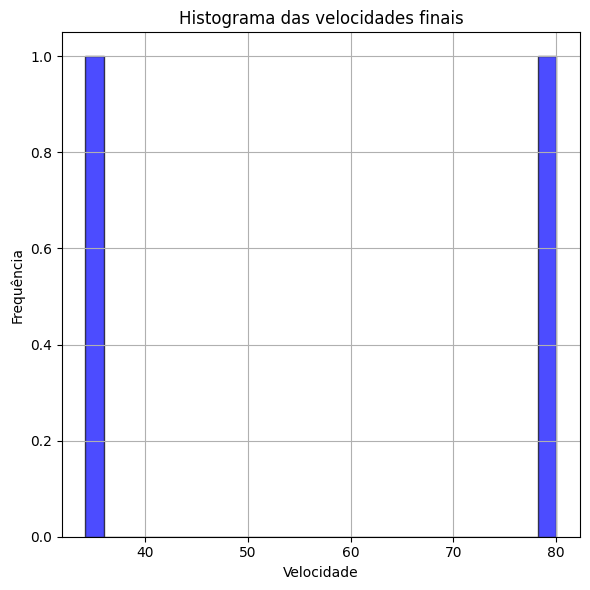

SystemExit: 

In [2]:
#Debugging 21-09-2023
#UI == pygame
#Implementado gráfico Max-Boltz
#Teste de colisao por grids ainda não implementado
#QOL == previsão de colisao em 2*dt
#Colisões funcionam (ver6.7) - previsão implementada
#Colisão inelástica implementada
#Fazer: adaptar colisões para classe (talvez?)


import math
import random
import warnings
import pygame
from pygame.locals import *
from sys import exit
import numpy as np
import matplotlib.pyplot as plt

# Constants
FPS = 60
dt = 1/FPS
altura_caixa = 200
largura_caixa = 200
num_particulas = 2
grid_size = 10
tipo_colisao = 'elastic'
C = 0.8 #coeficiente de restituição

# Colors
WHITE = (255, 255, 255)

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor

    def deslocar(self):

        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def check_collision(p1, p2):

    p1_x_future = p1.x + p1.vel_x *dt*3
    p1_y_future = p1.y + p1.vel_y *dt*3
    
    p2_x_future = p2.x + p2.vel_x *dt*2
    p2_y_future = p2.y + p2.vel_y *dt*2

    distance_future = math.sqrt((p2_x_future - p1_x_future)**2 + (p2_y_future - p1_y_future)**2)
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if ((distance <= p1.raio + p2.raio) or (distance_future <= p1.raio + p2.raio)) == True:
        return True
    else:
        return False

class Grid:
    def __init__(self, width, height, cell_size):
        self.width = width
        self.height = height
        self.cell_size = cell_size
        self.num_cols = int(width / cell_size)
        self.num_rows = int(height / cell_size)
        self.grid = [[] for _ in range(self.num_cols * self.num_rows)]

    def clear(self):
        self.grid = [[] for _ in range(self.num_cols * self.num_rows)]

    def index(self, x, y):
        col = int(x / self.cell_size)
        row = int(y / self.cell_size)
        
        # Ensure col and row are within bounds
        col = max(0, min(col, self.num_cols - 1))
        row = max(0, min(row, self.num_rows - 1))
        
        return col + row * self.num_cols

    def insert(self, particle):
        idx = self.index(particle.x, particle.y)
        self.grid[idx].append(particle)

    def get_particles_in_cell(self, x, y):
        idx = self.index(x, y)
        return self.grid[idx]

    def update_grid(particles, grid):
        grid.clear()
        for particle in particles.values():
            grid.insert(particle)


    def check_grid_collision(particles, grid):
        for particle in particles.values():
            cell_x = int(particle.x / grid.cell_size)
            cell_y = int(particle.y / grid.cell_size)

            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    neighbor_x = cell_x + dx
                    neighbor_y = cell_y + dy
                    if 0 <= neighbor_x < grid.num_cols and 0 <= neighbor_y < grid.num_rows:
                        for neighbor in grid.get_particles_in_cell(neighbor_x * grid.cell_size, neighbor_y * grid.cell_size):
                            if particle != neighbor and check_collision(particle, neighbor):
                                print(f"Collision detected between {particle} and {neighbor}")
                                resolve_collision(particle, neighbor, collision_type=tipo_colisao)
                            




def resolve_collision(p1, p2, collision_type='elastic'):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    print('arrays_x:', x1, x2)

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    print('arrays_v:', v1, v2)

    if collision_type == 'elastic' or collision_type == 'elastica':
        #print('elastica')

        new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
        new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))


    if collision_type == 'inelastic' or collision_type == 'inelastica':
        #print('inelastica')

        new_v1 = v1 - ((((C * p2.massa) + p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2),(x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
        new_v2 = v2 - ((((C * p1.massa) + p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1),(x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

    print(p1.vel_x, p1.vel_y, p2.vel_x, p2.vel_y)

#src_elastica = https://en.wikipedia.org/wiki/Elastic_collision#Two-dimensional_collision_with_two_moving_objects
#src_inelastica = https://physics.stackexchange.com/questions/708495/angle-free-two-dimensional-inelastic-collision-formula


def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}

    #atomos
    atomos = {
        "Na": {"massa": 22, "raio": 10, "color": (255, 0, 0)},
        "Cl": {"massa": 35, "raio": 10, "color": (0, 255, 0)},
        "H": {"massa": 1, "raio": 10, "color": (0, 0, 255)},
        "O":{"massa": 16, "raio": 10, "color": (225, 225, 0)}
    }

    for particle_index in range(1, n_particulas + 1):
        #escolha de distribuição aleatória
        atomos_selecionar = random.choice(list(atomos.keys()))

        attributes = atomos[atomos_selecionar]
        
        massa = attributes["massa"]
        raio = attributes["raio"]
        vel_x = random.uniform(-100, 100) #velocidade inicial não especificada
        vel_y = random.uniform(-100, 100)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = attributes["color"]
        nome_particula = f"{atomos_selecionar}_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance

    return particulas


def intersection_pos_checker(particles,iteration_max = 100):
    iteration_count = 0
    intersection = False
    for particle_name, particle_instance in particles.items():
        for other_particle_name, other_particle_instance in particles.items():
            if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                particle_move = random.choice([[particle_name,particle_instance], [other_particle_name,other_particle_instance]])
                new_x = random.uniform(particle_move[1].raio, largura_caixa - (particle_move[1].raio))
                new_y = random.uniform(particle_move[1].raio, altura_caixa - (particle_move[1].raio))
                particles[particle_move[0]].x = new_x
                particles[particle_move[0]].y = new_y
                iteration_count +=1
                #print(particles[particle_move[0]].y) #verificar coordenadas alteradas

                intersection = True
                if iteration_max == iteration_count:
                    warnings.warn(f'{iteration_max} iterações atingidas. Deve haver partículas sobrepostas. Altere o tamanho da caixa.')
                    return particles
    
    if intersection == True:
        #print('True')
        return intersection_pos_checker(particles)

    if intersection == False:
        #print('False')
        return particles

def create_particle_sprites(particles):
    sprites = pygame.sprite.Group()
    for particle_instance in particles.values():
        circle = pygame.Surface((particle_instance.raio * 2, particle_instance.raio * 2), pygame.SRCALPHA)
        pygame.draw.circle(circle, particle_instance.cor, (particle_instance.raio, particle_instance.raio), particle_instance.raio)
        sprite = pygame.sprite.Sprite()
        sprite.image = circle
        sprite.rect = sprite.image.get_rect(center=(particle_instance.x, particle_instance.y))
        sprites.add(sprite)
    return sprites

def main():
    final_speeds = []
    pygame.init()
    screen = pygame.display.set_mode((largura_caixa, altura_caixa))
    pygame.display.set_caption("Collision Simulation")

    particles = gerar_particula(num_particulas, largura_caixa, altura_caixa)
    particles = intersection_pos_checker(particles)
    sprites = create_particle_sprites(particles)

    grid = Grid(largura_caixa, altura_caixa, grid_size)

    clock = pygame.time.Clock()

    while True:
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                # Pegar velocidades finais de todas as particulas
                for particle_instance in particles.values():
                    final_speed = math.sqrt(particle_instance.vel_x**2 + particle_instance.vel_y**2)
                    final_speeds.append(final_speed)

                # Barplot/histograma das velocidades Max-Boltz.
                fig, ax = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
                plt.hist(final_speeds, bins=25, color='blue', edgecolor='black', alpha=0.7)
                plt.xlabel('Velocidade')
                plt.ylabel('Frequência')
                plt.title('Histograma das velocidades finais')
                plt.grid(True)
                fig.tight_layout()
                fig.savefig("max-boltz_6_8_1.png")  # Salva a figura

                plt.show()
                exit()

        # Update particle positions first
        for particle_name, particle_instance in particles.items():
            particle_instance.deslocar()

        
        Grid.check_grid_collision(particles, grid) #parece que o problema está na ordem dos dois ou update_grid nao atualiza a tempo
        Grid.update_grid(particles, grid)

        # Update sprite positions
        for sprite, particle_instance in zip(sprites, particles.values()):
            sprite.rect.center = (particle_instance.x, particle_instance.y)

        screen.fill(WHITE)
        sprites.draw(screen)

        pygame.display.flip()
        clock.tick(FPS)

if __name__ == "__main__":
    main()



Collision detected between <__main__.Particula object at 0x000001C458BF1FA0> and <__main__.Particula object at 0x000001C458760B50>
arrays_x: [160.54702847 162.35690533] [173.02214158 165.15001085]
arrays_v: [ 51.16567993 -86.15658492] [-42.85897065 -29.33429973]
-26.2557607884264 -103.49079675274403 34.56247006283051 -12.00008789782403
Collision detected between <__main__.Particula object at 0x000001C458760B50> and <__main__.Particula object at 0x000001C458BF1FA0>
arrays_x: [173.59818274 164.95000938] [160.10943245 160.63205872]
arrays_v: [ 34.56247006 -12.0000879 ] [ -26.25576079 -103.49079675]
-47.168082210874374 -38.163259798506495 55.47479148527849 -77.32762485206158
Collision detected between <__main__.Particula object at 0x000001C458BF1FA0> and <__main__.Particula object at 0x000001C458760B50>
arrays_x: [160.10943245 160.63205872] [173.59818274 164.95000938]
arrays_v: [ 55.47479149 -77.32762485] [-47.16808221 -38.1632598 ]
-26.2557607884264 -103.49079675274405 34.56247006283051 -

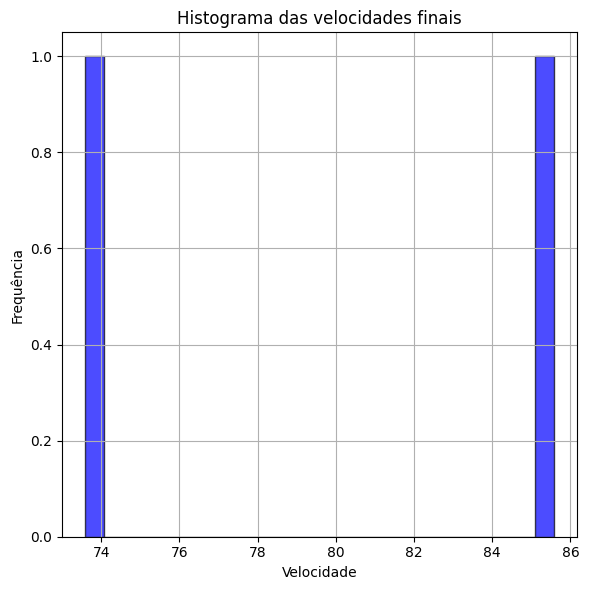

SystemExit: 

In [4]:
#Debugging 21-09-2023
#UI == pygame
#Implementado gráfico Max-Boltz
#Teste de colisao por grids ainda não implementado
#QOL == previsão de colisao em 2*dt
#Colisões funcionam (ver6.7) - previsão implementada
#Colisão inelástica implementada
#Fazer: adaptar colisões para classe (talvez?)


import math
import random
import warnings
import pygame
from pygame.locals import *
from sys import exit
import numpy as np
import matplotlib.pyplot as plt

# Constants
FPS = 60
dt = 1/FPS
altura_caixa = 200
largura_caixa = 200
num_particulas = 2
grid_size = 10
tipo_colisao = 'elastic'
C = 0.8 #coeficiente de restituição

# Colors
WHITE = (255, 255, 255)

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor

    def deslocar(self):

        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def check_collision(p1, p2):

    p1_x_future = p1.x + p1.vel_x *dt*3
    p1_y_future = p1.y + p1.vel_y *dt*3
    
    p2_x_future = p2.x + p2.vel_x *dt*2
    p2_y_future = p2.y + p2.vel_y *dt*2

    distance_future = math.sqrt((p2_x_future - p1_x_future)**2 + (p2_y_future - p1_y_future)**2)
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if ((distance <= p1.raio + p2.raio) or (distance_future <= p1.raio + p2.raio)) == True:
        return True
    else:
        return False

class Grid:
    def __init__(self, width, height, cell_size):
        self.width = width
        self.height = height
        self.cell_size = cell_size
        self.num_cols = int(width / cell_size)
        self.num_rows = int(height / cell_size)
        self.grid = [[] for _ in range(self.num_cols * self.num_rows)]

    def clear(self):
        self.grid = [[] for _ in range(self.num_cols * self.num_rows)]

    def index(self, x, y):
        col = int(x / self.cell_size)
        row = int(y / self.cell_size)
        
        # Ensure col and row are within bounds
        col = max(0, min(col, self.num_cols - 1))
        row = max(0, min(row, self.num_rows - 1))
        
        return col + row * self.num_cols

    def insert(self, particle):
        idx = self.index(particle.x, particle.y)
        self.grid[idx].append(particle)

    def get_particles_in_cell(self, x, y):
        idx = self.index(x, y)
        return self.grid[idx]

    # Inside the Grid class
    def update_grid(self, particles):
        self.clear()
        for particle in particles.values():
            self.insert(particle)




    def check_grid_collision(self, particles, grid):
        for particle in particles.values():
            cell_x = int(particle.x / grid.cell_size)
            cell_y = int(particle.y / grid.cell_size)

            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    neighbor_x = cell_x + dx
                    neighbor_y = cell_y + dy
                    if 0 <= neighbor_x < grid.num_cols and 0 <= neighbor_y < grid.num_rows:
                        for neighbor in grid.get_particles_in_cell(neighbor_x * grid.cell_size, neighbor_y * grid.cell_size):
                            if particle != neighbor and check_collision(particle, neighbor):
                                print(f"Collision detected between {particle} and {neighbor}")
                                resolve_collision(particle, neighbor, collision_type=tipo_colisao)
                            




def resolve_collision(p1, p2, collision_type='elastic'):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    print('arrays_x:', x1, x2)

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    print('arrays_v:', v1, v2)

    if collision_type == 'elastic' or collision_type == 'elastica':
        #print('elastica')

        new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
        new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))


    if collision_type == 'inelastic' or collision_type == 'inelastica':
        #print('inelastica')

        new_v1 = v1 - ((((C * p2.massa) + p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2),(x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
        new_v2 = v2 - ((((C * p1.massa) + p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1),(x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

    print(p1.vel_x, p1.vel_y, p2.vel_x, p2.vel_y)

#src_elastica = https://en.wikipedia.org/wiki/Elastic_collision#Two-dimensional_collision_with_two_moving_objects
#src_inelastica = https://physics.stackexchange.com/questions/708495/angle-free-two-dimensional-inelastic-collision-formula


def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}

    #atomos
    atomos = {
        "Na": {"massa": 10, "raio": 10, "color": (255, 0, 0)},
        "Cl": {"massa": 10, "raio": 10, "color": (0, 255, 0)},
        "H": {"massa": 10, "raio": 10, "color": (0, 0, 255)},
        "O":{"massa": 10, "raio": 10, "color": (225, 225, 0)}
    }

    for particle_index in range(1, n_particulas + 1):
        #escolha de distribuição aleatória
        atomos_selecionar = random.choice(list(atomos.keys()))

        attributes = atomos[atomos_selecionar]
        
        massa = attributes["massa"]
        raio = attributes["raio"]
        vel_x = random.uniform(-100, 100) #velocidade inicial não especificada
        vel_y = random.uniform(-100, 100)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = attributes["color"]
        nome_particula = f"{atomos_selecionar}_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance

    return particulas


def intersection_pos_checker(particles,iteration_max = 100):
    iteration_count = 0
    intersection = False
    for particle_name, particle_instance in particles.items():
        for other_particle_name, other_particle_instance in particles.items():
            if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                particle_move = random.choice([[particle_name,particle_instance], [other_particle_name,other_particle_instance]])
                new_x = random.uniform(particle_move[1].raio, largura_caixa - (particle_move[1].raio))
                new_y = random.uniform(particle_move[1].raio, altura_caixa - (particle_move[1].raio))
                particles[particle_move[0]].x = new_x
                particles[particle_move[0]].y = new_y
                iteration_count +=1
                #print(particles[particle_move[0]].y) #verificar coordenadas alteradas

                intersection = True
                if iteration_max == iteration_count:
                    warnings.warn(f'{iteration_max} iterações atingidas. Deve haver partículas sobrepostas. Altere o tamanho da caixa.')
                    return particles
    
    if intersection == True:
        #print('True')
        return intersection_pos_checker(particles)

    if intersection == False:
        #print('False')
        return particles

def create_particle_sprites(particles):
    sprites = pygame.sprite.Group()
    for particle_instance in particles.values():
        circle = pygame.Surface((particle_instance.raio * 2, particle_instance.raio * 2), pygame.SRCALPHA)
        pygame.draw.circle(circle, particle_instance.cor, (particle_instance.raio, particle_instance.raio), particle_instance.raio)
        sprite = pygame.sprite.Sprite()
        sprite.image = circle
        sprite.rect = sprite.image.get_rect(center=(particle_instance.x, particle_instance.y))
        sprites.add(sprite)
    return sprites

def main():
    final_speeds = []
    pygame.init()
    screen = pygame.display.set_mode((largura_caixa, altura_caixa))
    pygame.display.set_caption("Collision Simulation")

    particles = gerar_particula(num_particulas, largura_caixa, altura_caixa)
    particles = intersection_pos_checker(particles)
    sprites = create_particle_sprites(particles)

    grid = Grid(largura_caixa, altura_caixa, grid_size)

    clock = pygame.time.Clock()

    while True:
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                # Pegar velocidades finais de todas as particulas
                for particle_instance in particles.values():
                    final_speed = math.sqrt(particle_instance.vel_x**2 + particle_instance.vel_y**2)
                    final_speeds.append(final_speed)

                # Barplot/histograma das velocidades Max-Boltz.
                fig, ax = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
                plt.hist(final_speeds, bins=25, color='blue', edgecolor='black', alpha=0.7)
                plt.xlabel('Velocidade')
                plt.ylabel('Frequência')
                plt.title('Histograma das velocidades finais')
                plt.grid(True)
                fig.tight_layout()
                fig.savefig("max-boltz_6_8_1.png")  # Salva a figura

                plt.show()
                exit()

        # Update particle positions first
        for particle_name, particle_instance in particles.items():
            particle_instance.deslocar()

        
        grid.check_grid_collision(particles, grid)
        grid.update_grid(particles)

        # Update sprite positions
        for sprite, particle_instance in zip(sprites, particles.values()):
            sprite.rect.center = (particle_instance.x, particle_instance.y)

        screen.fill(WHITE)
        sprites.draw(screen)

        pygame.display.flip()
        clock.tick(FPS)

if __name__ == "__main__":
    main()



Collision detected between <__main__.Particula object at 0x000001C458F505B0> and <__main__.Particula object at 0x000001C458F50EB0>
arrays_x: [ 88.52461007 401.2501975 ] [ 88.7967525  395.02723375]
arrays_v: [-31.77441685 -84.17610876] [-67.01162452  48.89814994]
-37.650169031838345 50.182184093365976 -61.13587234181695 -85.46014290896002
Collision detected between <__main__.Particula object at 0x000001C458D4AD00> and <__main__.Particula object at 0x000001C458D56730>
arrays_x: [18.45701644  0.86946417] [15.02635781  2.61911789]
arrays_v: [-80.66097981  24.74237125] [-5.00800599  6.67669396]
-13.312192990385952 -9.605859820083026 -72.35679280865351 41.02492503266461
Collision detected between <__main__.Particula object at 0x000001C458D4AD90> and <__main__.Particula object at 0x000001C458D4A490>
arrays_x: [ 33.10412071 431.16857589] [ 26.97340855 432.88770047]
arrays_v: [-87.08224982 -17.96326678] [ 12.80093111 -67.07864063]
18.288107478399212 -47.5103677162833 -92.56942619461746 -37.5315

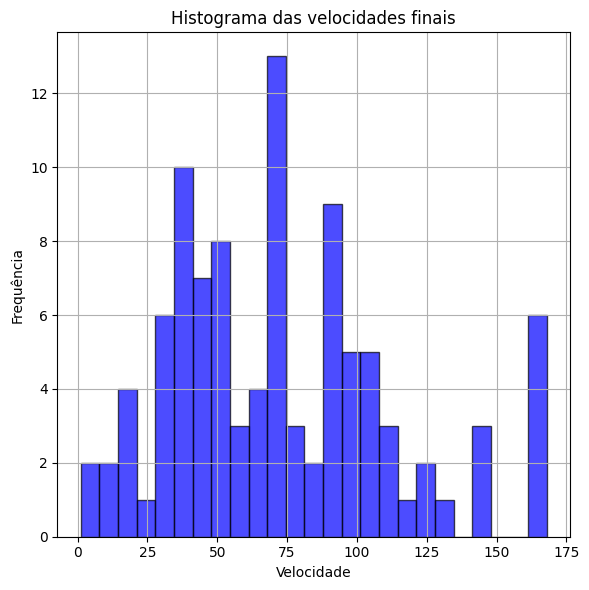

SystemExit: 

In [9]:
#Debugging 21-09-2023
#UI == pygame
#Implementado gráfico Max-Boltz
#Teste de colisao por grids ainda não implementado
#QOL == previsão de colisao em 2*dt
#Colisões funcionam (ver6.7) - previsão implementada
#Colisão inelástica implementada
#Fazer: adaptar colisões para classe (talvez?)


import math
import random
import warnings
import pygame
from pygame.locals import *
from sys import exit
import numpy as np
import matplotlib.pyplot as plt

# Constants
FPS = 60
dt = 1/FPS
altura_caixa = 500
largura_caixa = 500
num_particulas = 100
grid_size = 10
tipo_colisao = 'elastic'
C = 0.8 #coeficiente de restituição

# Colors
WHITE = (255, 255, 255)

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor

    def deslocar(self):

        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def check_collision(p1, p2):

    p1_x_future = p1.x + p1.vel_x *dt*3
    p1_y_future = p1.y + p1.vel_y *dt*3
    
    p2_x_future = p2.x + p2.vel_x *dt*2
    p2_y_future = p2.y + p2.vel_y *dt*2

    distance_future = math.sqrt((p2_x_future - p1_x_future)**2 + (p2_y_future - p1_y_future)**2)
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if ((distance <= p1.raio + p2.raio) or (distance_future <= p1.raio + p2.raio)) == True:
        return True
    else:
        return False

class Grid:
    def __init__(self, width, height, cell_size):
        self.width = width
        self.height = height
        self.cell_size = cell_size
        self.num_cols = int(width / cell_size)
        self.num_rows = int(height / cell_size)
        self.grid = [[] for _ in range(self.num_cols * self.num_rows)]

    def clear(self):
        self.grid = [[] for _ in range(self.num_cols * self.num_rows)]

    def index(self, x, y):
        col = int(x / self.cell_size)
        row = int(y / self.cell_size)
        
        # Ensure col and row are within bounds
        col = max(0, min(col, self.num_cols - 1))
        row = max(0, min(row, self.num_rows - 1))
        
        return col + row * self.num_cols

    def insert(self, particle):
        idx = self.index(particle.x, particle.y)
        self.grid[idx].append(particle)

    def get_particles_in_cell(self, x, y):
        idx = self.index(x, y)
        return self.grid[idx]

    # Inside the Grid class
    def update_grid(self, particles):
        self.clear()
        for particle in particles.values():
            self.insert(particle)




    def check_grid_collision(self, particles, grid):
        for particle in particles.values():
            cell_x = int(particle.x / grid.cell_size)
            cell_y = int(particle.y / grid.cell_size)

            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    neighbor_x = cell_x + dx
                    neighbor_y = cell_y + dy
                    if 0 <= neighbor_x < grid.num_cols and 0 <= neighbor_y < grid.num_rows:
                        for neighbor in grid.get_particles_in_cell(neighbor_x * grid.cell_size, neighbor_y * grid.cell_size):
                            if particle != neighbor and check_collision(particle, neighbor):
                                print(f"Collision detected between {particle} and {neighbor}")
                                resolve_collision(particle, neighbor, collision_type=tipo_colisao)
                            




def resolve_collision(p1, p2, collision_type='elastic'):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    print('arrays_x:', x1, x2)

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    print('arrays_v:', v1, v2)

    if collision_type == 'elastic' or collision_type == 'elastica':
        #print('elastica')

        new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
        new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))


    if collision_type == 'inelastic' or collision_type == 'inelastica':
        #print('inelastica')

        new_v1 = v1 - ((((C * p2.massa) + p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2),(x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
        new_v2 = v2 - ((((C * p1.massa) + p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1),(x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

    print(p1.vel_x, p1.vel_y, p2.vel_x, p2.vel_y)

#src_elastica = https://en.wikipedia.org/wiki/Elastic_collision#Two-dimensional_collision_with_two_moving_objects
#src_inelastica = https://physics.stackexchange.com/questions/708495/angle-free-two-dimensional-inelastic-collision-formula


def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}

    #atomos
    atomos = {
        "Na": {"massa": 10, "raio": 1, "color": (255, 0, 0)},
        "Cl": {"massa": 10, "raio": 1, "color": (0, 255, 0)},
        "H": {"massa": 10, "raio": 1, "color": (0, 0, 255)},
        "O":{"massa": 10, "raio": 1, "color": (225, 225, 0)}
    }

    for particle_index in range(1, n_particulas + 1):
        #escolha de distribuição aleatória
        atomos_selecionar = random.choice(list(atomos.keys()))

        attributes = atomos[atomos_selecionar]
        
        massa = attributes["massa"]
        raio = attributes["raio"]
        vel_x = random.uniform(-100, 100) #velocidade inicial não especificada
        vel_y = random.uniform(-100, 100)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = attributes["color"]
        nome_particula = f"{atomos_selecionar}_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance

    return particulas


def intersection_pos_checker(particles,iteration_max = 100):
    iteration_count = 0
    intersection = False
    for particle_name, particle_instance in particles.items():
        for other_particle_name, other_particle_instance in particles.items():
            if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                particle_move = random.choice([[particle_name,particle_instance], [other_particle_name,other_particle_instance]])
                new_x = random.uniform(particle_move[1].raio, largura_caixa - (particle_move[1].raio))
                new_y = random.uniform(particle_move[1].raio, altura_caixa - (particle_move[1].raio))
                particles[particle_move[0]].x = new_x
                particles[particle_move[0]].y = new_y
                iteration_count +=1
                #print(particles[particle_move[0]].y) #verificar coordenadas alteradas

                intersection = True
                if iteration_max == iteration_count:
                    warnings.warn(f'{iteration_max} iterações atingidas. Deve haver partículas sobrepostas. Altere o tamanho da caixa.')
                    return particles
    
    if intersection == True:
        #print('True')
        return intersection_pos_checker(particles)

    if intersection == False:
        #print('False')
        return particles

def create_particle_sprites(particles):
    sprites = pygame.sprite.Group()
    for particle_instance in particles.values():
        circle = pygame.Surface((particle_instance.raio * 2, particle_instance.raio * 2), pygame.SRCALPHA)
        pygame.draw.circle(circle, particle_instance.cor, (particle_instance.raio, particle_instance.raio), particle_instance.raio)
        sprite = pygame.sprite.Sprite()
        sprite.image = circle
        sprite.rect = sprite.image.get_rect(center=(particle_instance.x, particle_instance.y))
        sprites.add(sprite)
    return sprites

def main():
    final_speeds = []
    pygame.init()
    screen = pygame.display.set_mode((largura_caixa, altura_caixa))
    pygame.display.set_caption("Collision Simulation")

    particles = gerar_particula(num_particulas, largura_caixa, altura_caixa)
    particles = intersection_pos_checker(particles)
    sprites = create_particle_sprites(particles)

    grid = Grid(largura_caixa, altura_caixa, grid_size)

    clock = pygame.time.Clock()

    while True:
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                # Pegar velocidades finais de todas as particulas
                for particle_instance in particles.values():
                    final_speed = math.sqrt(particle_instance.vel_x**2 + particle_instance.vel_y**2)
                    final_speeds.append(final_speed)

                # Barplot/histograma das velocidades Max-Boltz.
                fig, ax = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
                plt.hist(final_speeds, bins=25, color='blue', edgecolor='black', alpha=0.7)
                plt.xlabel('Velocidade')
                plt.ylabel('Frequência')
                plt.title('Histograma das velocidades finais')
                plt.grid(True)
                fig.tight_layout()
                fig.savefig("max-boltz_6_8_1.png")  # Salva a figura

                plt.show()
                exit()

        # Update the grid with the new particle positions
        grid.update_grid(particles)

        # Check for collisions based on the updated grid
        grid.check_grid_collision(particles, grid)

        # Resolve collisions after updating positions
        for particle_name, particle_instance in particles.items():
            for other_particle_name, other_particle_instance in particles.items():
                if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                    print(f"Collision detected between {particle_name} and {other_particle_name}")
                    resolve_collision(particle_instance, other_particle_instance, collision_type=tipo_colisao)

        # Update particle positions after collision detection
        for particle_name, particle_instance in particles.items():
            particle_instance.deslocar()

        # Update sprite positions
        for sprite, particle_instance in zip(sprites, particles.values()):
            sprite.rect.center = (particle_instance.x, particle_instance.y)

        screen.fill(WHITE)
        sprites.draw(screen)

        pygame.display.flip()
        clock.tick(FPS)

if __name__ == "__main__":
    main()



In [ ]:
def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}

    #atomos
    atomos = {
        "Na": {"massa": 22, "raio": 22, "color": (255, 0, 0)},
        "Cl": {"massa": 35, "raio": 35, "color": (0, 255, 0)},
        "H": {"massa": 1, "raio": 1, "color": (0, 0, 255)},
        "O":{"massa": 16, "raio": 16, "color": (225, 225, 0)}
    }